In [1]:
from genparse import CFG, Real, examples
#from wfsa.field_wfsa import WFSA as RealWFSA
from wfsa.semiring_wfsa import WFSA as SemiringWFSA, EPSILON
from semirings import Float, Symbol
from itertools import product

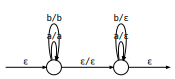

In [2]:
m = SemiringWFSA(Symbol)
m.add_I(0, Symbol.one)
for a in 'ab': m.add_arc(0, a, 0, Symbol(a))         # copy
m.add_arc(0, EPSILON, 1, Symbol.one)
for a in 'ab': m.add_arc(1, a, 1, Symbol.one)   # erase
m.add_F(1, Symbol.one)
m

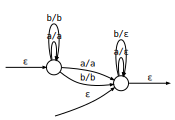

In [3]:
m.epsremove

In [4]:
cfg = CFG.from_string("""

0.4: S -> S a
0.4: S -> S b
0.1: S ->

""", Real)

In [5]:
def compose(self, fst):
    "Return a CFG denoting the composition of `self` with a finite-state transducer `fst`."
    new_start = self.S
    new = self.spawn(S = new_start)   # TODO: the output alphabet should come from the transducer!
    
    for r in self:
        for qs in product(fst.states, repeat=1+len(r.body)):
            new.add(r.w, (qs[0], r.head, qs[-1]), *((qs[i], r.body[i], qs[i+1]) for i in range(len(r.body))))
            
    for qi, wi in fst.start.items():
        for qf, wf in fst.stop.items():
            assert wi == Symbol.one
            assert wf == Symbol.one
#                new.add(wi*wf, new_start, (qi, self.S, qf))
            new.add(self.R.one, new_start, (qi, self.S, qf))

    for i, a, j, b in fst.arcs():   # change symbol `a` to symbol `b` with weight `w`
        w = self.R.one
        assert a != EPSILON
        if b == Symbol.one:
            new.add(w, (i, a, j), )
        else:
            new.add(w, (i, a, j), str(b))   # TODO: this is a hack to make the regex a string; it might fail to produce a string

    return new

In [6]:
cc = compose(cfg, m.epsremove)
cc

0.4: (0, 'S', 0) → (0, 'S', 0) (0, 'a', 0)
0.4: (0, 'S', 1) → (0, 'S', 0) (0, 'a', 1)
0.4: (0, 'S', 0) → (0, 'S', 1) (1, 'a', 0)
0.4: (0, 'S', 1) → (0, 'S', 1) (1, 'a', 1)
0.4: (1, 'S', 0) → (1, 'S', 0) (0, 'a', 0)
0.4: (1, 'S', 1) → (1, 'S', 0) (0, 'a', 1)
0.4: (1, 'S', 0) → (1, 'S', 1) (1, 'a', 0)
0.4: (1, 'S', 1) → (1, 'S', 1) (1, 'a', 1)
0.4: (0, 'S', 0) → (0, 'S', 0) (0, 'b', 0)
0.4: (0, 'S', 1) → (0, 'S', 0) (0, 'b', 1)
0.4: (0, 'S', 0) → (0, 'S', 1) (1, 'b', 0)
0.4: (0, 'S', 1) → (0, 'S', 1) (1, 'b', 1)
0.4: (1, 'S', 0) → (1, 'S', 0) (0, 'b', 0)
0.4: (1, 'S', 1) → (1, 'S', 0) (0, 'b', 1)
0.4: (1, 'S', 0) → (1, 'S', 1) (1, 'b', 0)
0.4: (1, 'S', 1) → (1, 'S', 1) (1, 'b', 1)
0.1: (0, 'S', 0) → 
0.1: (1, 'S', 1) → 
1: S → (0, 'S', 1)
1: S → (1, 'S', 1)
1: (0, 'a', 0) → a
1: (0, 'a', 1) → a
1: (0, 'b', 0) → b
1: (0, 'b', 1) → b
1: (1, 'a', 1) → 
1: (1, 'b', 1) →

In [7]:
cc.cnf

0.4999999999955205: S → 
1.0: (0, 'b', 1) → b
0.20000000000000007: S → b
0.04000000000000001: $(0, 'S', 0) → b
1.0: (0, 'b', 0) → b
1.0: (0, 'a', 1) → a
0.20000000000000007: S → a
0.04000000000000001: $(0, 'S', 0) → a
1.0: (0, 'a', 0) → a
2.0000000000000004: S → $(0, 'S', 0) (0, 'b', 1)
0.4: $(0, 'S', 0) → $(0, 'S', 0) (0, 'b', 0)
2.0000000000000004: S → $(0, 'S', 0) (0, 'a', 1)
0.4: $(0, 'S', 0) → $(0, 'S', 0) (0, 'a', 0)

In [8]:
#m = SemiringWFSA(Symbol)
#for token in 
#m.add_I(0, Symbol.one)
#for a in 'ab': m.add_arc(0, a, 0, Symbol(a))         # copy
#m.add_arc(0, EPSILON, 1, Symbol.one)
#for a in 'ab': m.add_arc(1, a, 1, Symbol.one)   # erase
#m.add_F(1, Symbol.one)
#m

In [9]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
print(f'token vocabulary size: {tokenizer.vocab_size}')

token vocabulary size: 50257


In [10]:
T = [(token_id, tokenizer.decode([token_id])) for token_id in range(tokenizer.vocab_size)]

In [11]:
sum(len(x) for _, x in T)

319329

In [20]:
import random
random.seed(8675309)
S = random.sample(T, 5)
S

[(26361, 'zon'),
 (14032, ' purple'),
 (33439, ' MIDI'),
 (43499, 'announced'),
 (33034, ' hardened')]

Output()

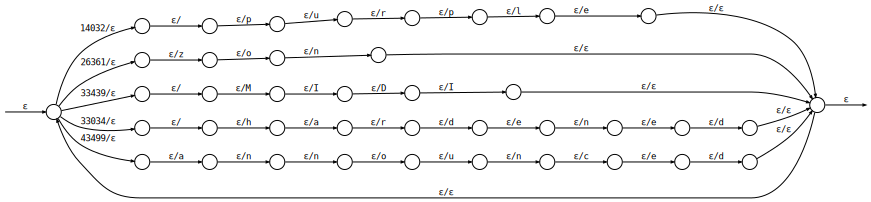

In [21]:
m = SemiringWFSA(Symbol)
m.add_I('<s>', Symbol.one)
for i, x in iterview(S): 
    #m.add_arc('<s>', i, i, np.product([Symbol(y) for y in x]))
    m.add_arc('<s>', i, (i, 0), Symbol.one)
    for j in range(len(x)):
        m.add_arc((i,j), EPSILON, (i,j+1), Symbol(x[j]))
    m.add_arc((i,len(x)), EPSILON, '</s>', Symbol.one)
m.add_F('</s>', Symbol.one)
m.add_arc('</s>', EPSILON, '<s>', Symbol.one)
m